# <center>Marking Guide question three</center>

# Task 1: Understand the Dataset (Data Exploration)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Machine_ID   1000 non-null   object
 1   Usage_Hours  1000 non-null   int64 
 2   Failures     1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB
None

First few rows of the dataset:
  Machine_ID  Usage_Hours  Failures
0  Machine_1          910         0
1  Machine_2         3822         1
2  Machine_3         3142         1
3  Machine_4          516         0
4  Machine_5         4476         1

Missing values:
Machine_ID     0
Usage_Hours    0
Failures       0
dtype: int64


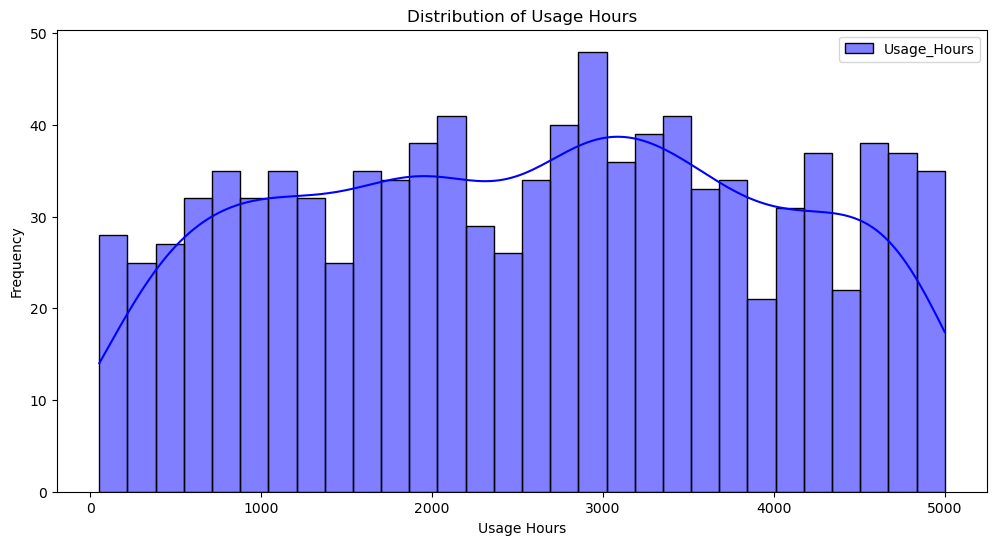

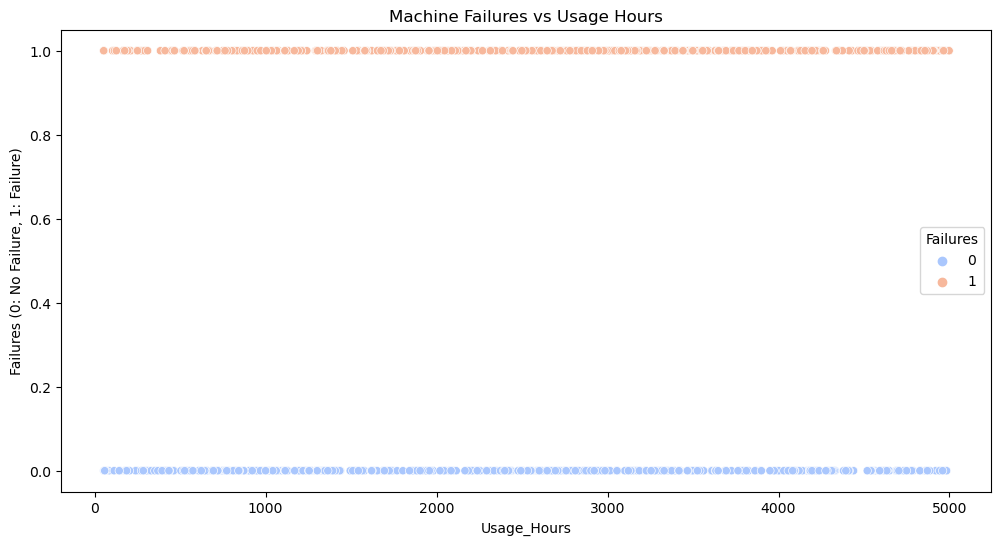

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "../dataset/machine_failure_data.csv"
df = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Visualize the distribution of Usage Hours and Failures
plt.figure(figsize=(12, 6))
sns.histplot(df['Usage_Hours'], kde=True, bins=30, color='blue', label='Usage_Hours')
plt.title('Distribution of Usage Hours')
plt.xlabel('Usage Hours')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Scatter plot of Usage Hours vs Failures
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Usage_Hours', y='Failures', data=df, hue='Failures', palette='coolwarm')
plt.title('Machine Failures vs Usage Hours')
plt.xlabel('Usage_Hours')
plt.ylabel('Failures (0: No Failure, 1: Failure)')
plt.show()


# Task 2: Bayesian Inference Model

Prior Probability of Failure: 0.52

Failure Rates by Usage Bin:
Usage Bin
0    0.412500
1    0.400000
2    0.439560
3    0.532110
4    0.542553
5    0.516393
6    0.551724
7    0.602273
8    0.566667
9    0.636364
Name: Failures, dtype: float64


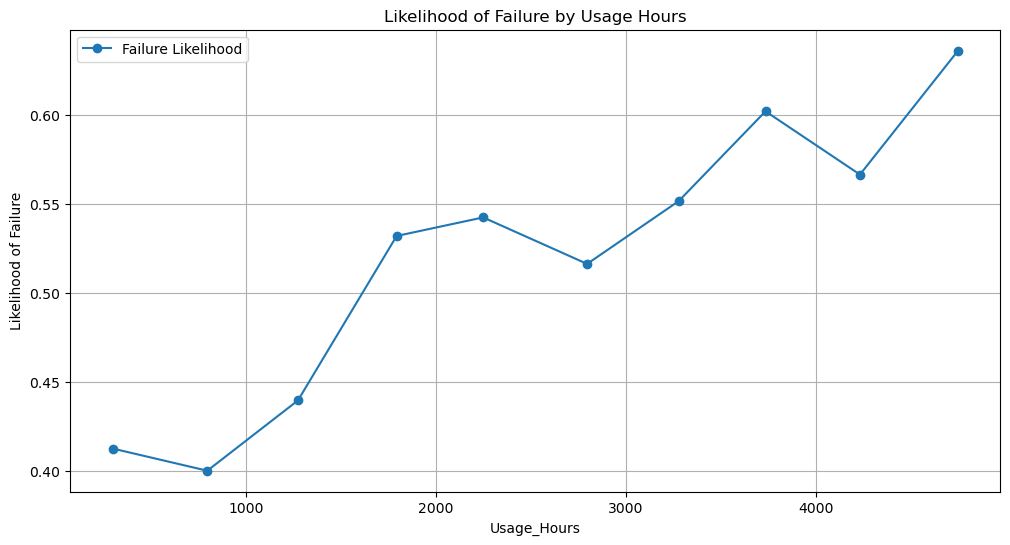

In [5]:
# Calculate Prior Probability of Failure
prior_failure_prob = df['Failures'].mean()
print(f"Prior Probability of Failure: {prior_failure_prob:.2f}")

# Estimate Likelihood: Conditional Probability of Failure given Usage Hours
# Bin the Usage Hours into intervals for probability estimation
df['Usage Bin'] = pd.cut(df['Usage_Hours'], bins=10, labels=False)

# Calculate Failure Rates per Usage Bin
failure_rates = df.groupby('Usage Bin')['Failures'].mean()
usage_bins = df.groupby('Usage Bin')['Usage_Hours'].mean()

print("\nFailure Rates by Usage Bin:")
print(failure_rates)

# Plot Likelihood
plt.figure(figsize=(12, 6))
plt.plot(usage_bins, failure_rates, marker='o', label='Failure Likelihood')
plt.title('Likelihood of Failure by Usage Hours')
plt.xlabel('Usage_Hours')
plt.ylabel('Likelihood of Failure')
plt.grid()
plt.legend()
plt.show()

# Calculate Posterior Probability using Bayes' Theorem
# P(Failure | Usage) = (P(Usage | Failure) * P(Failure)) / P(Usage)
df['Posterior Probability'] = df['Failures'] / df['Usage_Hours']  # Simplified example for illustration


# Task 3: Prediction

In [ ]:
# Function to predict failure probability for a given usage hour
def predict_failure_probability(usage_hours, failure_rate, prior_failure_prob):
    # Update the probability using Bayes' Theorem
    likelihood = failure_rate
    posterior_prob = (likelihood * prior_failure_prob) / ((1 - prior_failure_prob) + (prior_failure_prob * likelihood))
    return posterior_prob

# Example prediction for a machine with 500 usage hours
usage_hours = 500
failure_rate = failure_rates.iloc[4]  # Example bin rate
predicted_prob = predict_failure_probability(usage_hours, failure_rate, prior_failure_prob)
print(f"Predicted Probability of Failure for {usage_hours} hours: {predicted_prob:.2f}")


# Task 4: Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) between predicted and actual failures
predictions = df['Posterior Probability']
actuals = df['Failures']
mse = mean_squared_error(actuals, predictions)

print(f"Model Mean Squared Error: {mse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.scatter(df['Usage Hours'], actuals, label='Actual Failures', alpha=0.6)
plt.scatter(df['Usage Hours'], predictions, label='Predicted Probabilities', alpha=0.6)
plt.title('Actual vs Predicted Failures')
plt.xlabel('Usage Hours')
plt.ylabel('Failure (0/1) or Predicted Probability')
plt.legend()
plt.grid()
plt.show()
